In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


As you saw in the last section, this dataset includes view and click actions on the homepage of Audacity's site from users that were shown the control and experiment version of an A/B test. Our task is to analyze these actions to see if there was a significant difference in perfoirmance for the two version. To do this, let's first compute the click through rate for each group. Let's start with the control group.

In [26]:
# We can extract all the actions from the control group like this
control_df = df.query('group == "control"')

# Now, to compute the click through rate, we'll divide the number of unique users who actually clicked
# the Explore Courses button by the total number of unique users who viewed the page
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
control_ctr
# This gives us a click through rate of about ___

0.2797118847539016

In [28]:
# Let's do the same for the experiment group
experiment_df = df.query('group == "experiment"')
# Again, we'll take all the click actions, get the unique number of users,
# and divide that by the number of unique users who viewed the page
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
# That gives us a click through rate of about ___
experiment_ctr

0.3097463284379172

In [18]:
# So in this sample, the experiment group's click through rate was higher than the control group's click through rate
# by about ___
obs_diff = experiment_ctr - control_ctr
obs_diff

0.020388820180640199

Now that we know the observed difference in this sample, we have to see if this difference in significant, and not just due to chance. Let's bootstrap this sample to simulate the sampling distribution for the difference in proportions.

In [19]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_df = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

In [20]:
diffs = np.array(diffs)

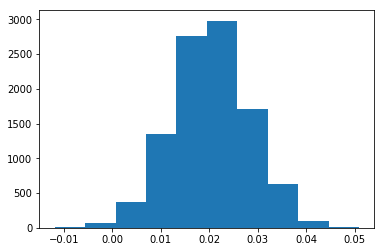

In [21]:
# Let's take a look at our sampling distribution
plt.hist(diffs);

In [22]:
# If you remember from the previous lesson, we can compute the p-value for our statistic,
# the observed difference in proportions, by simulating the distribution under the null hypothesis and then
# finding the probability that our statistic came from that distribution. To simulate the null, we'll create a normal
# distribution centered at zero, with the same standard devation and size as our simulated sampling distribution
null_vals = np.random.normal(0, diffs.std(), diffs.size)

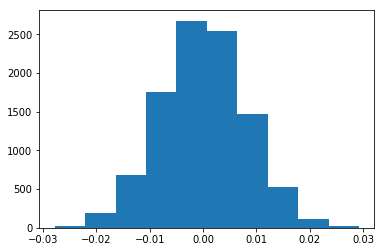

In [23]:
# which looks like this
plt.hist(null_vals);

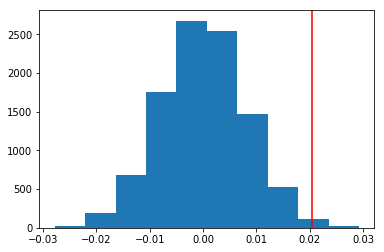

In [24]:
# And this is where our observed statistic falls
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

In [25]:
# We find the p-value like this
(null_vals > obs_diff).mean()

0.0054000000000000003

With a p-value of _ , the difference in click through rates for the control and experiment groups appear to be significant. We can reject the null hypothesis. Based on these results, it looks like Audacity should launch the new version of the homepage!